Лабораторная 3

Информация о диабете индейцев Пима

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv(".//scv//diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Столбцы на русском:
'Pregnancies' - количество беременностей
'Glucose' - уровень глюкозы
'BloodPressure'- кровяное давление
'SkinThickness' - толщина кожи
'Insulin' - уровень инсулина
'BMI' - ИМТ
'DiabetesPedigreeFunction' - функция родословной диабета
'Age' - возраст
'Outcome' - исход

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Объект наблюдения - экономика
Атрибуты - содержит набор информации об обучении, такие как:
количество беременностей, глюкоза, кровяное давление, толщина кожи, ИМТ, возраст и другие атрибуты

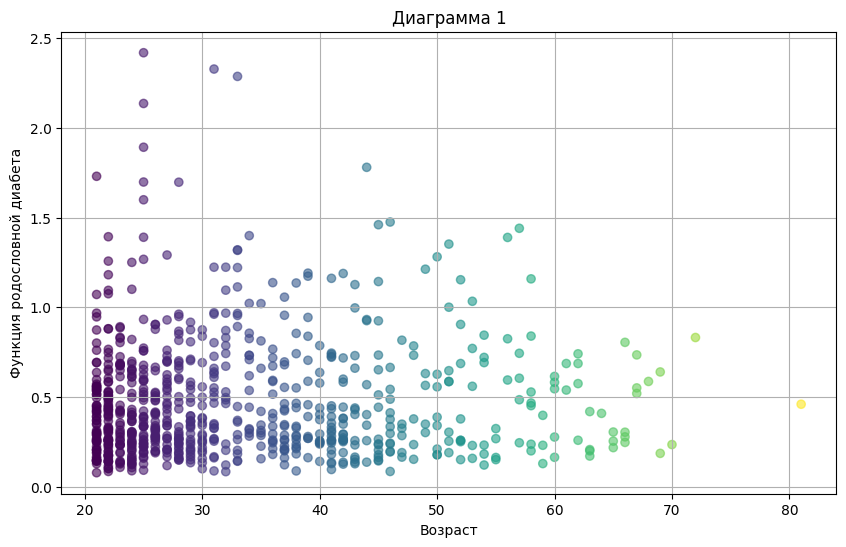

In [18]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Age'], df['DiabetesPedigreeFunction'], c=df['Age'], alpha=0.6)

plt.title("Диаграмма 1")
plt.ylabel("Функция родословной диабета")
plt.xlabel("Возраст")
plt.grid(visible='true')

plt.show()

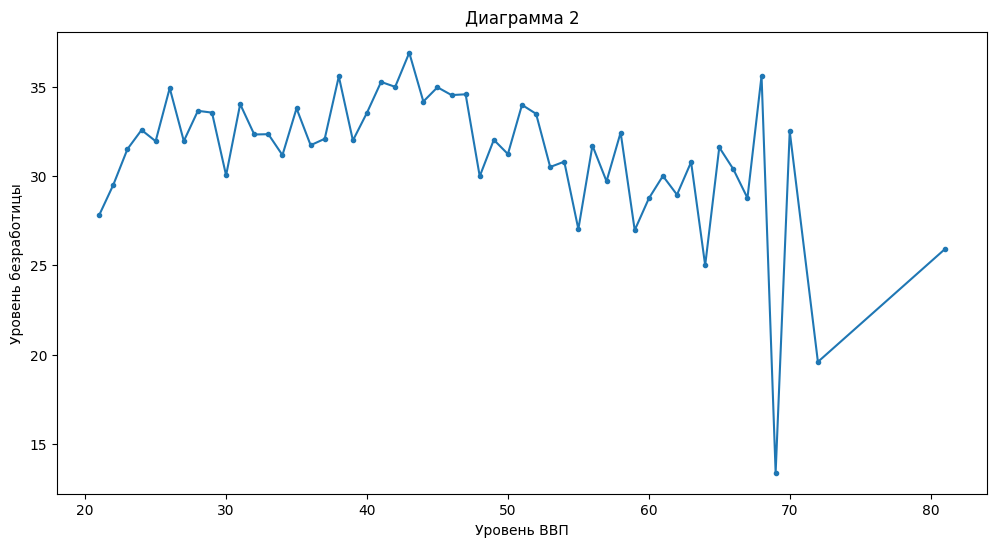

In [19]:
df_dependence = df.groupby('Age')['BMI'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(df_dependence['Age'], df_dependence['BMI'], marker='.')

plt.title("Диаграмма 2")
plt.xlabel("Возраст")
plt.ylabel("ИМТ")


plt.show()

Присутствует связь между атрибутами, уровень инфляции влияет и зависит от многих атрибутов.
Для примера на графике приведена связь между инфляцией и доходом на душу населения. На втором графике показана связь уровня ВВП и безработицы
Примеры бизнес целей

    1.Прогнозирование уровня инфляции на основе уровня ВВП.
    2.Наблюдение за изменениями уровня безработицы с уровнем ВВП.
    
Эффект для бизнеса: влияние на инвестиции индекса акций и цен на нефть, исследование влияния фондового индекса на инвестиции, исследования инфляции и покупательской способности.
Цели технического проекта

Для первой цели:

Вход: Доход на душу населения
Целевой признак: Уровень инфляции.

Для второй цели:

Вход: Уровень безработицы
Целевой признак: Уровень ВВП

Проверка на выбросы

In [20]:
null_values = df.isnull().sum()
print("Пропущенные значения по столбцам:")
print(null_values)

stat_summary = df.describe()
print("\nСтатистический обзор данных:")
print(stat_summary)


Пропущенные значения по столбцам:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Статистический обзор данных:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000

На основе данных выше можно выделить что нулевых данных нет
Также проверим данные на выбросы и дубликаты:

In [21]:
for column in df.select_dtypes(include=[np.number]).columns:
    skewness = df[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")

duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")



Коэффициент асимметрии для столбца 'Pregnancies': 0.9016739791518588

Коэффициент асимметрии для столбца 'Glucose': 0.17375350179188992

Коэффициент асимметрии для столбца 'BloodPressure': -1.8436079833551302

Коэффициент асимметрии для столбца 'SkinThickness': 0.10937249648187608

Коэффициент асимметрии для столбца 'Insulin': 2.272250858431574

Коэффициент асимметрии для столбца 'BMI': -0.42898158845356543

Коэффициент асимметрии для столбца 'DiabetesPedigreeFunction': 1.919911066307204

Коэффициент асимметрии для столбца 'Age': 1.1295967011444805

Коэффициент асимметрии для столбца 'Outcome': 0.635016643444986

Количество дубликатов: 0


На основе данных выше можно сказать, что для столбцов выбросы незначительны. Дупликатов нет

Очистка данных от шумов:

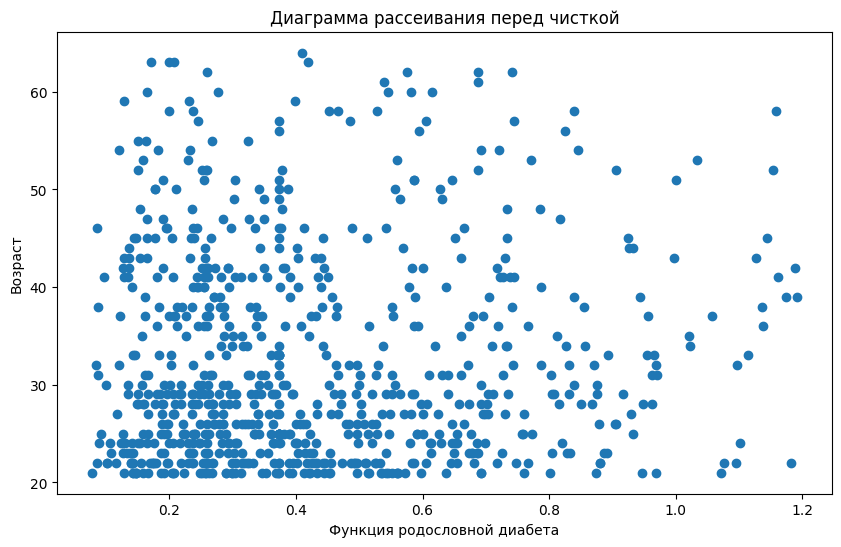

Выбросы в датасете:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
131            9      122             56              0      0.0  33.3   
152            9      156             86             28    155.0  34.3   
267            2      128             64             42      0.0  40.0   
270           10      101             86             37      0.0  45.6   
314            7      109             80             31      0.0  35.9   
408            8      197             74              0      0.0  25.9   
416            1       97             68             21      0.0  27.2   
434            1       90             68              8      0.0  24.5   
487            0      173             78             32    265.0  46.5   
493            4      125             70             18    122.0  28.9   
588            3      176             86             27    156.0  33.3   
657            1      120             80             48    200.0  38.9   
744           13  

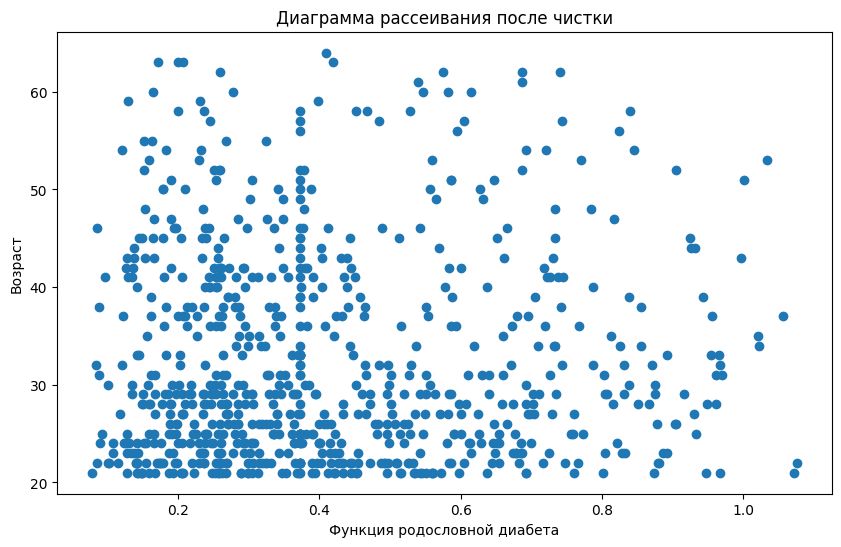

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Age'])
plt.xlabel('Функция родословной диабета')
plt.ylabel('Возраст')
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = df["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df["DiabetesPedigreeFunction"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (df["DiabetesPedigreeFunction"] < lower_bound) | (df["DiabetesPedigreeFunction"] > upper_bound)

# Вывод выбросов
print("Выбросы в датасете:")
print(df[outliers])

# Заменяем выбросы на медианные значения
median_score = df["DiabetesPedigreeFunction"].median()
df.loc[outliers, "DiabetesPedigreeFunction"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Age'])
plt.xlabel('Функция родословной диабета')
plt.ylabel('Возраст')
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [27]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 460
Размер контрольной выборки: 154
Размер тестовой выборки: 154


Видим недостаток баланса

In [28]:
def check_balance(df, name):
    counts = df['DiabetesPedigreeFunction'].value_counts()
    print(f"Распределение функции родословной диабета в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение функции родословной диабета в обучающей выборке:
DiabetesPedigreeFunction
0.37250    12
0.37175    10
0.25800     5
0.19700     4
0.23800     4
           ..
0.52600     1
0.60000     1
0.45400     1
0.70400     1
0.46300     1
Name: count, Length: 332, dtype: int64

Распределение функции родословной диабета в контрольной выборке:
DiabetesPedigreeFunction
0.37250    10
0.14200     3
0.37175     3
0.25400     3
0.14100     2
           ..
0.24500     1
0.69300     1
0.12100     1
0.68600     1
0.12200     1
Name: count, Length: 130, dtype: int64

Распределение функции родословной диабета в тестовой выборке:
DiabetesPedigreeFunction
0.3725    7
0.1480    2
0.4430    2
0.2070    2
0.5200    2
         ..
0.2480    1
0.2360    1
0.3020    1
0.4850    1
0.7050    1
Name: count, Length: 134, dtype: int64



также используем oversampling и undersampling

In [33]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def binning(target, bins):
    return pd.qcut(target, q=bins, labels=False)

train_df['gdppercent_binned'] = binning(train_df['DiabetesPedigreeFunction'], bins=2)
val_df['gdppercent_binned'] = binning(val_df['DiabetesPedigreeFunction'], bins=2)
test_df['gdppercent_binned'] = binning(test_df['DiabetesPedigreeFunction'], bins=2)

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, 'gdppercent_binned')
val_df_oversampled = oversample(val_df, 'gdppercent_binned')
test_df_oversampled = oversample(test_df, 'gdppercent_binned')

train_df_undersampled = undersample(train_df, 'gdppercent_binned')
val_df_undersampled = undersample(val_df, 'gdppercent_binned')
test_df_undersampled = undersample(test_df, 'gdppercent_binned')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение функции родословной диабета в обучающей выборке:
DiabetesPedigreeFunction
0.37250    12
0.37175    10
0.25800     5
0.19700     4
0.23800     4
           ..
0.52600     1
0.60000     1
0.45400     1
0.70400     1
0.46300     1
Name: count, Length: 332, dtype: int64

Распределение функции родословной диабета в контрольной выборке:
DiabetesPedigreeFunction
0.3725    10
0.4390     4
0.1420     3
0.7300     3
0.2540     3
          ..
0.2450     1
0.6930     1
0.1210     1
0.6860     1
0.1220     1
Name: count, Length: 130, dtype: int64

Распределение функции родословной диабета в тестовой выборке:
DiabetesPedigreeFunction
0.3725    7
0.1480    2
0.4430    2
0.2070    2
0.5200    2
         ..
0.2480    1
0.2360    1
0.3020    1
0.4850    1
0.7050    1
Name: count, Length: 134, dtype: int64

Андерсэмплинг:
Распределение функции родословной диабета в обучающей выборке:
DiabetesPedigreeFunction
0.37250    12
0.37175    10
0.25800     5
0.29900     4
0.19700     4